In [34]:
%matplotlib inline
import d2lzh as d2l
from mxnet import autograd,gluon,init,nd
from mxnet.gluon import data as gdata,loss as gloss,nn

n_train,n_test,num_inputs = 20,100,200
true_w,true_b = nd.ones((num_inputs,1)) *0.01,0.05

features = nd.random.normal(shape=(n_train+n_test,num_inputs))
labels = nd.dot(features,true_w) + true_b
labels += nd.random.normal(scale=0.01,shape=labels.shape)
train_features,test_features = features[:n_train,:],features[:n_train,:]
train_labels,test_labels = labels[:n_train],labels[n_train:]

In [35]:
def init_params():
    w = nd.random.normal(scale=1,shape=(num_inputs,1))
    b = nd.zeros(shape=(1,))
    w.attach_grad()
    b.attach_grad()
    return [w,b]

In [36]:
def l2_penalty(w):
    return (w**2).sum()/2

In [37]:
batch_size,num_epochs,lr = 1,1000,0.003
net,loss = d2l.linreg,d2l.squared_loss
train_iter = gdata.DataLoader(gdata.ArrayDataset(train_features,train_labels),batch_size,shuffle=True)

def fit_and_plot(lambd):
    w,b = init_params()
    train_ls,test_ls = [],[]
    for _ in range(num_epochs):
        for X,y in train_iter:
            with autograd.record():
                # 惩罚
                l = loss(net(X,w,b),y) + lambd*l2_penalty(w)
            l.backward()
            d2l.sgd([w,b],lr,batch_size)
        train_ls.append(loss(net(train_features,w,b),train_labels).mean().asscalar())
        test_ls.append(loss(net(test_features,w,b),test_labels).mean().asscalar())
    d2l.semilogy(range(1,num_epochs+1),train_ls,'epoch','loss',range(1,num_epochs+1),test_ls,['train','test'])
    print('L2 norm of w : ',w.norm().asscalar())

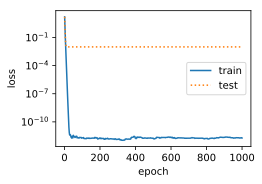

L2 norm of w :  13.631925


In [38]:
fit_and_plot(lambd=0)

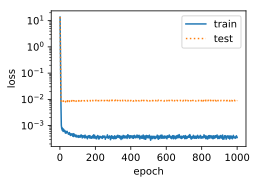

L2 norm of w :  0.03663675


In [39]:
fit_and_plot(lambd=3)